# Uploading and Preprocessing Data

In [ ]:
import datetime 
from datetime import datetime, date, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import utils
import model_variations
import my_statistics
from utils import *
from simple_breakout import * 
from model_variations import * 
from my_statistics import *
from data_collection import *

%load_ext autoreload
%autoreload 2


In [ ]:
df = utils.create_and_preprocess_trading_data("2024-01-01", "2024-11-20", False, 'data/data')

In [2]:
df_2 = utils.create_and_preprocess_trading_data("2024-01-01", "2024-11-20", True, 'data/data')

In [3]:
pandas_data = df.to_pandas()

In [3]:
pandas_data_2 = df_2.to_pandas()

# Running Model 1

In [173]:
trading_stats_11 = model_1_6(pandas_data_2, df_2, model_variations.model_1_day_9, threshold=3.5, window=400, minimum_fvg_size=0)

In [ ]:
# trading_stats_11 = pd.read_csv('trading_stats_11.csv')

In [ ]:
thresholds = [1.5, 2, 2.5, 3, 3.5, 4]
windows = [200, 400, 800, 1600, 3200, 6400, 12800]
min_fvg_sizes = [0, 1, 2, 3]

search_results = grid_search(pandas_data_2, df_2, model_1_day_9, thresholds, windows, min_fvg_sizes, NYSEOpen = False)

{'Total PnL ($)': -6625.0, 'Total R': -6.916704539471736, 'Win Rate (%)': 50.83333333333333, 'Max Drawdown ($)': 12075.0, 'Max Drawdown Duration (days)': 168.0, 'Expected Value per Trade ($)': -55.208333333333336, 'Profit Factor': 0.7917485265225933, 'Total Gross Profit ($)': 25187.5, 'Total Gross Loss ($)': -31812.5, 'Wins': 61.0, 'Losses': 59.0, 'Total Days Recorded': 278.0, 'Total Trades': 120.0, 'Total Days Not Traded': 112.0, 'Bullish Trades': 66.0, 'Bearish Trades': 54.0, 'threshold': 1.5, 'window': 200, 'minimum_fvg_size': 0}
{'Total PnL ($)': -2512.5, 'Total R': -2.559604362506731, 'Win Rate (%)': 53.125, 'Max Drawdown ($)': 8125.0, 'Max Drawdown Duration (days)': 161.0, 'Expected Value per Trade ($)': -26.171875, 'Profit Factor': 0.8956386292834891, 'Total Gross Profit ($)': 21562.5, 'Total Gross Loss ($)': -24075.0, 'Wins': 51.0, 'Losses': 45.0, 'Total Days Recorded': 278.0, 'Total Trades': 96.0, 'Total Days Not Traded': 136.0, 'Bullish Trades': 52.0, 'Bearish Trades': 44.0, 

In [ ]:
# search_results = pd.read_csv('search_results.csv')

# Statistics and Plots

### Model_1_11

In [174]:
important_statistics(trading_stats_11)

,Total PnL ($),Total R,Win Rate (%),Max Drawdown ($),Max Drawdown Duration (days),Expected Value per Trade ($),Profit Factor,Total Gross Profit ($),Total Gross Loss ($),Wins,Losses,Total Days Recorded,Total Trades,Total Days Not Traded,Bullish Trades,Bearish Trades
0,27162.5,29.733041,27.419355,14762.5,75,219.052419,1.311586,114337.5,-87175.0,34,90,278,124,108,64,60


In [175]:
EV_CI(trading_stats_11['R'])

Expected Value per Trade: 0.2397825852105631
95.0% Confidence Interval for Expected Value per Trade: (-0.039, 0.519)


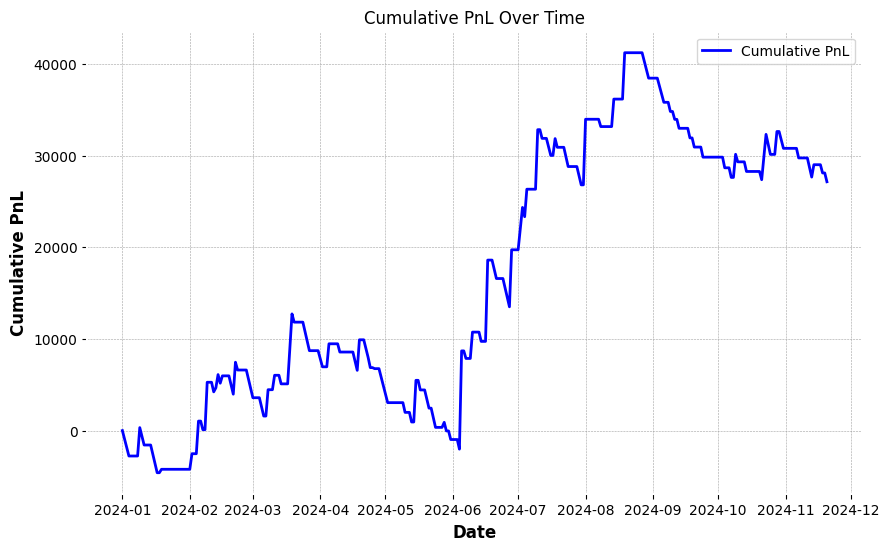

In [176]:
cumulative_PnL(trading_stats_11)

In [177]:
trading_stats_11.sort_values(by='R', ascending=False).iloc[0:4]

,Date,Direction,PnL,R,Win,Contracts,Entry_Time,Entry_Price,Exit_Time,Exit_Price,Trade_Duration,IB_Range_Size,Stop_Loss_Placement,Gap_Size,Trade_Duration (mins),Cumulative_PnL
133,2024-06-05,bullish,10725.0,11.000000,True,6.0,11:10:00,5330.50,16:59:00,5366.25,NaN,9.00,5327.25,0.50,349.000000,8700.0
143,2024-06-17,bullish,8875.0,9.466667,True,5.0,11:33:46,5511.50,15:59:53,5547.00,NaN,8.25,5507.75,0.75,266.116667,18612.5
182,2024-08-01,bearish,7162.5,7.346154,True,3.0,11:16:28,5519.75,16:59:00,5472.00,NaN,30.50,5526.25,5.50,342.533333,33987.5
153,2024-06-28,bearish,6225.0,6.640000,True,3.0,11:22:04,5562.00,15:59:48,5520.50,NaN,19.75,5568.25,1.25,277.733333,19737.5


/Users/marcwalden/Desktop/ELC_folder/my_statistics.py:129: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stats['Entry_Time'] = pd.to_datetime(stats['Entry_Time'], errors='coerce')
/Users/marcwalden/Desktop/ELC_folder/my_statistics.py:133: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  stats['Entry_Time_Bin'] = stats['Entry_Time'].dt.floor(time_bin_label)


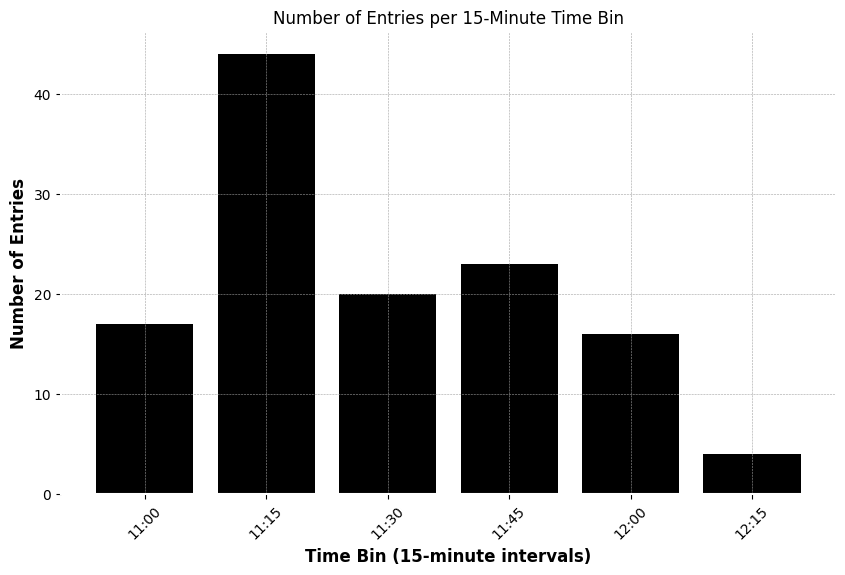

In [178]:
count_entries_by_time_bin(trading_stats_11)

/Users/marcwalden/Desktop/ELC_folder/my_statistics.py:100: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  stats['Entry_Time_Bin'] = stats['Entry_Time'].dt.floor(time_bin_label)


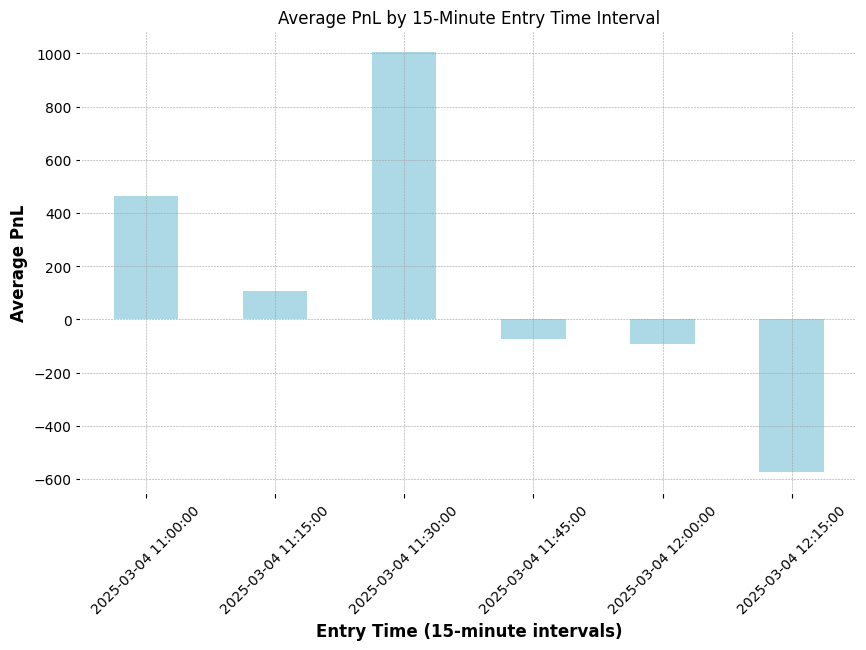

In [179]:
performance_by_time_of_entry(trading_stats_11)

In [180]:
trading_stats_11['Entry_Time_dt'] = pd.to_datetime(trading_stats_11['Entry_Time'])

In [181]:
filtered_trading_stats_11 = trading_stats_11[(trading_stats_11['Entry_Time_dt'].dt.hour == 11)]

In [182]:
important_statistics(filtered_trading_stats_11)

/Users/marcwalden/Desktop/ELC_folder/my_statistics.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['Date'] = pd.to_datetime(stats['Date'], errors='coerce')


,Total PnL ($),Total R,Win Rate (%),Max Drawdown ($),Max Drawdown Duration (days),Expected Value per Trade ($),Profit Factor,Total Gross Profit ($),Total Gross Loss ($),Wins,Losses,Total Days Recorded,Total Trades,Total Days Not Traded,Bullish Trades,Bearish Trades
0,30912.5,32.098158,27.884615,16225.0,26,297.235577,1.428968,102975.0,-72062.5,29,75,104,104,0,54,50


In [183]:
EV_CI(filtered_trading_stats_11['R'])

Expected Value per Trade: 0.30863613545651297
95.0% Confidence Interval for Expected Value per Trade: (-0.17, 0.788)


In [184]:
important_statistics(filtered_trading_stats_11[trading_stats_11["Direction"] == "bullish"])

/var/folders/sm/2tb6056n08n7nx834ynzmn940000gn/T/ipykernel_9903/1166037629.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  important_statistics(filtered_trading_stats_11[trading_stats_11["Direction"] == "bullish"])
/Users/marcwalden/Desktop/ELC_folder/my_statistics.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['Date'] = pd.to_datetime(stats['Date'], errors='coerce')


,Total PnL ($),Total R,Win Rate (%),Max Drawdown ($),Max Drawdown Duration (days),Expected Value per Trade ($),Profit Factor,Total Gross Profit ($),Total Gross Loss ($),Wins,Losses,Total Days Recorded,Total Trades,Total Days Not Traded,Bullish Trades,Bearish Trades
0,42725.0,44.190747,38.888889,5162.5,6,791.203704,2.350454,74362.5,-31637.5,21,33,54,54,0,54,0


In [188]:
EV_CI(filtered_trading_stats_11[trading_stats_11["Direction"] == "bullish"]['R'])

Expected Value per Trade: 0.8183471698705113
95.0% Confidence Interval for Expected Value per Trade: (0.061, 1.575)


/var/folders/sm/2tb6056n08n7nx834ynzmn940000gn/T/ipykernel_9903/3355289433.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  EV_CI(filtered_trading_stats_11[trading_stats_11["Direction"] == "bullish"]['R'])


/Users/marcwalden/Desktop/ELC_folder/my_statistics.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['Cumulative_PnL'] = PnL_processed.cumsum()


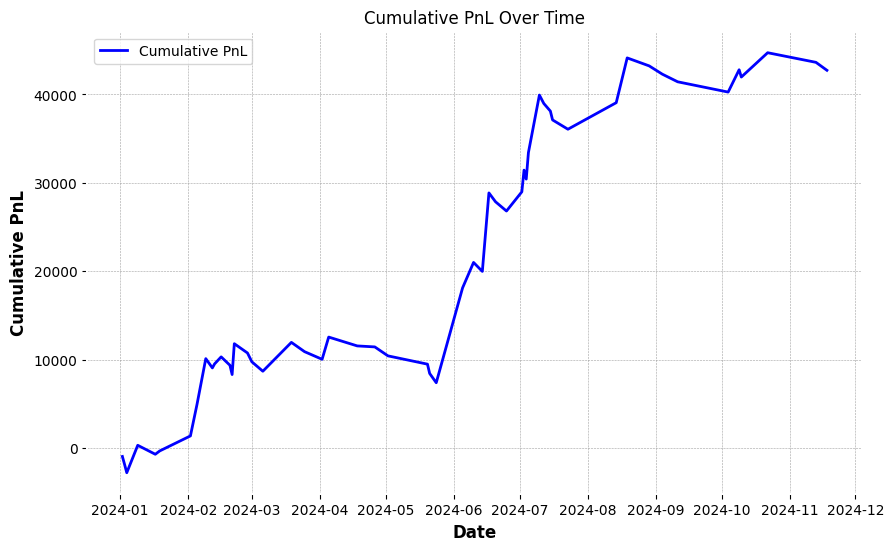

In [191]:
cumulative_PnL(filtered_trading_stats_11[filtered_trading_stats_11["Direction"] == "bullish"])

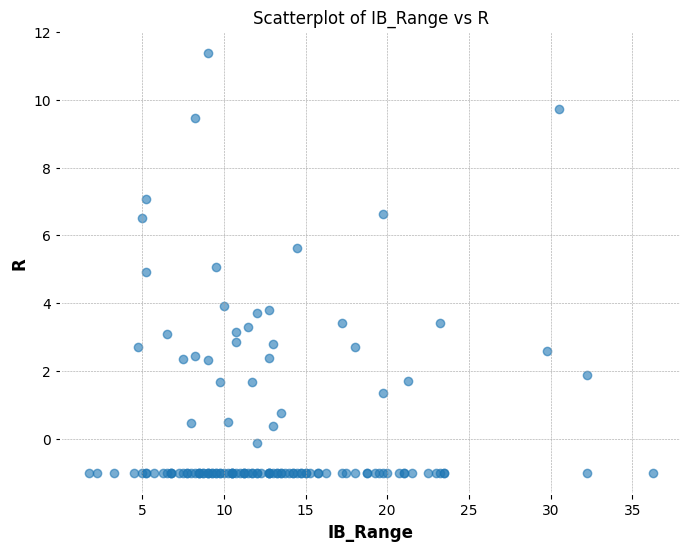

In [136]:
plt.figure(figsize=(8, 6))
plt.scatter(trading_stats_11['IB_Range_Size'], trading_stats_11['R'], alpha=0.6)
plt.title('Scatterplot of IB_Range vs R')
plt.xlabel('IB_Range')
plt.ylabel('R')
plt.grid(True)
plt.show()

/Users/marcwalden/Desktop/ELC_folder/my_statistics.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['Duration_Bin'] = pd.cut(stats['Trade_Duration (mins)'], bins=duration_bins, labels=duration_labels)
/Users/marcwalden/Desktop/ELC_folder/my_statistics.py:161: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ev_by_duration = stats.groupby('Duration_Bin')['PnL'].mean()


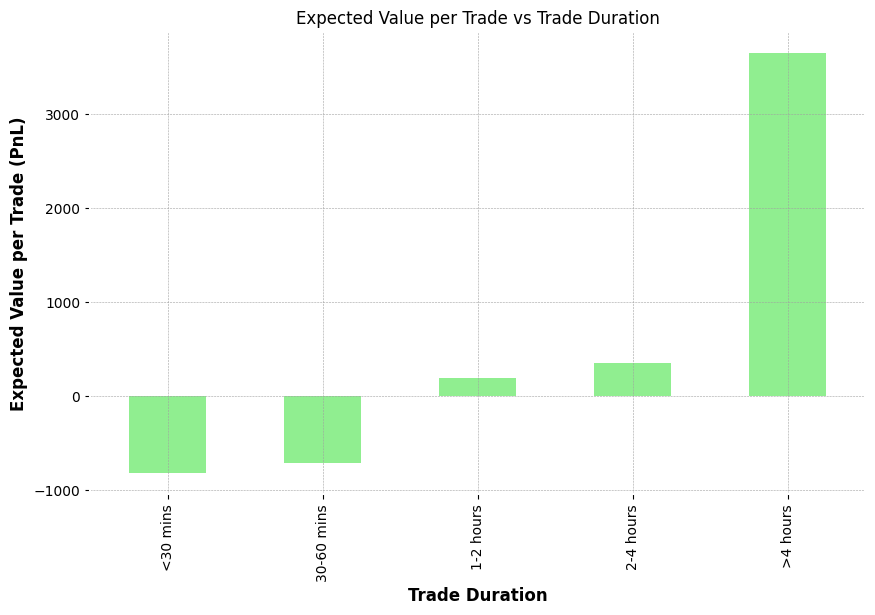

In [194]:
EV_vs_trade_duration(filtered_trading_stats_11)

In [193]:
print("Commission Costs: $", int(trading_stats_11['Contracts'].sum() * 4))
print("Slippage Costs: $", int(trading_stats_11['Contracts'].sum() * 12.5))

Commission Costs: $ 2028
Slippage Costs: $ 6337


# Grid Search

In [53]:
search_results[search_results["Total R"] == max(search_results["Total R"])]

,Total PnL ($),Total R,Win Rate (%),Max Drawdown ($),Max Drawdown Duration (days),Expected Value per Trade ($),Profit Factor,Total Gross Profit ($),Total Gross Loss ($),Wins,Losses,Total Days Recorded,Total Trades,Total Days Not Traded,Bullish Trades,Bearish Trades,threshold,window,minimum_fvg_size
8,30400.0,33.643359,40.40404,10650.0,72.0,307.070707,1.519325,88937.5,-58537.5,40.0,59.0,278.0,99.0,133.0,49.0,50.0,1.5,800,0


In [55]:
search_results[search_results["Expected Value per Trade ($)"] == max(search_results["Expected Value per Trade ($)"])]

,Total PnL ($),Total R,Win Rate (%),Max Drawdown ($),Max Drawdown Duration (days),Expected Value per Trade ($),Profit Factor,Total Gross Profit ($),Total Gross Loss ($),Wins,Losses,Total Days Recorded,Total Trades,Total Days Not Traded,Bullish Trades,Bearish Trades,threshold,window,minimum_fvg_size
11,25150.0,26.82392,44.0,4112.5,35.0,1006.0,2.837443,38837.5,-13687.5,11.0,14.0,278.0,25.0,207.0,13.0,12.0,1.5,800,3


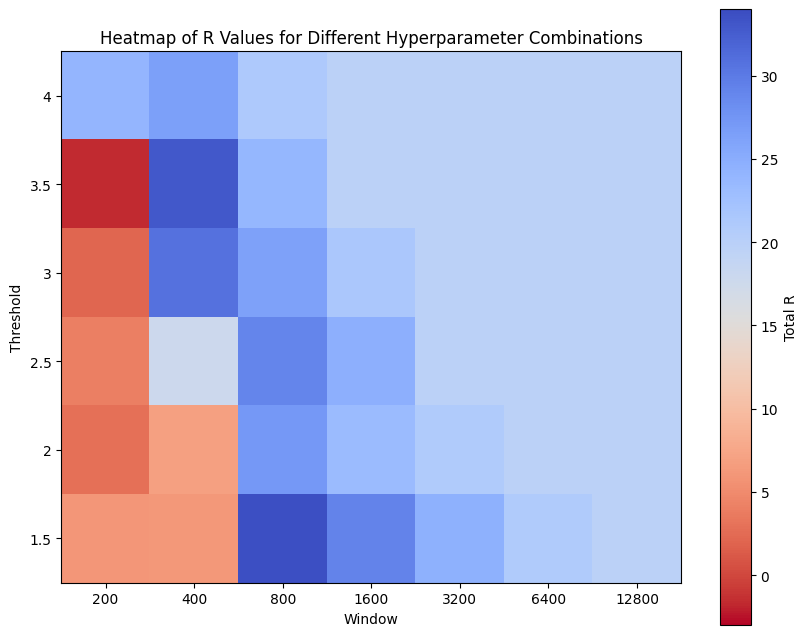

In [59]:
heatmap(search_results[search_results['minimum_fvg_size'] == 0])

# More analysis for refinement

### Overnight Expansion

In [ ]:
def analyze_nyam_range(df, threshold):
    """
    Analyze the average NY AM session range based on whether the overnight range was large.
    
    Parameters:
    - df: DataFrame with trading data
    - threshold: Threshold for determining whether the overnight range is large/expansionary
    
    Returns:
    - A dictionary with the average range for NY AM when overnight range was large vs small.
    """
    # Get all unique dates in the DataFrame
    all_dates = df['date'].unique()

    # Initialize variables to store total ranges and counts for large and small overnight ranges
    nyam_large_range = []
    nyam_small_range = []

    for _ in all_dates:
        is_large = overnight_range_large(df, str(date), threshold)

        olhc_data = olhcv_data(df, str(date))

        olhc_data_pandas = olhc_data.to_pandas()

        # Ensure 'time' column is in datetime format with explicit format
        olhc_data_pandas['time'] = pd.to_datetime(olhc_data_pandas['time'], format='%H:%M:%S', errors='coerce')

        # Now, filter for the NY AM session data (14:00 to 17:00) using Pandas
        nyam_data_pandas = olhc_data_pandas[(olhc_data_pandas['time'].dt.hour >= 14) & (olhc_data_pandas['time'].dt.hour < 17)]

        # Calculate the range for the NY AM session
        nyam_range = nyam_data_pandas['high'].max() - nyam_data_pandas['low'].min()

        # Add the range to the appropriate list based on whether the overnight range was large or small
        if is_large:
            nyam_large_range.append(nyam_range)
        elif not is_large:
            nyam_small_range.append(nyam_range)

    avg_nyam_large = sum(nyam_large_range) / len(nyam_large_range) if nyam_large_range else 0
    avg_nyam_small = sum(nyam_small_range) / len(nyam_small_range) if nyam_small_range else 0

    return {
        'avg_nyam_large': round(float(avg_nyam_large)),
        'avg_nyam_small': round(float(avg_nyam_small))
    }



In [72]:
analyze_nyam_range(df, 15)

{'avg_nyam_large': 36, 'avg_nyam_small': 18}

Data suggests that larger overnight ranges result in larger NY AM ranges.

### Range by Day of the Week

In [ ]:
def calculate_daily_range(df):
    """
    Calculate the daily range for each day using OHLCV data.
    
    Parameters:
    - df: DataFrame with trading data
    - olhcv_data_func: Function to get OHLCV data for a given date (olhcv_data)
    
    Returns:
    - DataFrame with daily range for each day
    """
    daily_ranges = []

    # Get all unique dates in the DataFrame
    all_dates = df['date'].unique()

    for _ in all_dates:
        # Get OHLCV data for the current date using the provided olhcv_data function
        olhc_data = olhcv_data(df, str(date))  # Assuming olhcv_data returns a DataFrame

        olhc_data_pandas = olhc_data.to_pandas()

        daily_high = olhc_data_pandas['high'].max()
        daily_low = olhc_data_pandas['low'].min()

        daily_range = daily_high - daily_low

        daily_ranges.append({
            'Date': date,
            'Daily_High': daily_high,
            'Daily_Low': daily_low,
            'Range': daily_range
        })

    daily_range_df = pd.DataFrame(daily_ranges)

    # Set 'Date' as the index
    daily_range_df.set_index('Date', inplace=True)

    return daily_range_df

In [ ]:
def analyze_smallest_range_day(daily_range):
    """
    Analyze which day of the week has the smallest average range.
    
    Parameters:
    - daily_range: DataFrame with the daily range for each day
    
    Returns:
    - The day of the week with the smallest average range
    """
    # Add the day of the week to the DataFrame
    daily_range['Day_of_Week'] = pd.to_datetime(daily_range.index).day_name()

    # Calculate the average range per day of the week
    avg_range_per_day = daily_range.groupby('Day_of_Week')['Range'].mean()

    return avg_range_per_day

In [ ]:
# Example Test calculate_daily_range function

daily_range = calculate_daily_range(df)
ranges = analyze_smallest_range_day(daily_range).drop('Sunday')

In [95]:
ranges

Day_of_Week
Friday       63.492647
Monday       54.270833
Thursday     70.585714
Tuesday      60.569444
Wednesday    70.770833
Name: Range, dtype: float64

In [108]:
print(f"Monday's range is {float(round(ranges.iloc[1] / ranges.mean(), 2)) * 100}% of the range for an average day.")

Monday's range is 85.0% of the range for an average day.
